## Imports

In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openmm.unit import AVOGADRO_CONSTANT_NA, BOLTZMANN_CONSTANT_kB
from openmm.unit import kelvin, bar, litre, kilojoule_per_mole, mole, nanometer, angstrom, kilocalorie_per_mole, molal, molar,grams,milliliter,kilogram
from openmm.unit import Quantity, Unit
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import json

/tmp/ipykernel_1411335/3222558274.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
R = BOLTZMANN_CONSTANT_kB * AVOGADRO_CONSTANT_NA # gas constant

def osm_experimental(exp_osm_coeff, molarity:Quantity=1*(mole/litre), vant_hoff:int=2, T=300*kelvin):
    osm_press_ideal=vant_hoff*molarity*R*T
    osm_press_ideal=osm_press_ideal.in_units_of(bar)
    osm_bar=exp_osm_coeff*osm_press_ideal
    op_error=(abs(osm_bar-osm_press_ideal)/osm_press_ideal)*100
    print(f'Ideal Osmotic Pressure: {osm_press_ideal} at concentraion {molarity}')
    print(f'Osmotic Pressure from experimental osmotic coefficient: {osm_bar}')
    return osm_bar


## Results for CHARMM27

## Results for OpenFF 2.1

In [3]:
off_file_1m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/OpenFF2.1/final_results_1m.json')
off_results_1m=json.load(off_file_1m)


off_op_1m=off_results_1m['mean_osmotic_pressure']
off_operr_1m=off_results_1m['uncertainity_osmotic_pressure']
off_oc_1m=off_results_1m['mean_osmotic_coefficient']
off_ocerr_1m=off_results_1m['uncertainity_osmotic_coefficient']

off_file_2m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/OpenFF2.1/final_results_2m.json')
off_results_2m=json.load(off_file_2m)
off_op_2m=off_results_2m['mean_osmotic_pressure']
off_operr_2m=off_results_2m['uncertainity_osmotic_pressure']
off_oc_2m=off_results_2m['mean_osmotic_coefficient']
off_ocerr_2m=off_results_2m['uncertainity_osmotic_coefficient']

off_file_3m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/OpenFF2.1/final_results_3m.json')
off_results_3m=json.load(off_file_3m)
off_op_3m=off_results_3m['mean_osmotic_pressure']
off_operr_3m=off_results_3m['uncertainity_osmotic_pressure']
off_oc_3m=off_results_3m['mean_osmotic_coefficient']
off_ocerr_3m=off_results_3m['uncertainity_osmotic_coefficient']

off_op=[off_op_1m,off_op_2m,off_op_3m]
off_operr=[off_operr_1m,off_operr_2m,off_operr_3m]
off_oc=[off_oc_1m,off_oc_2m,off_oc_3m]
off_ocerr=[off_ocerr_1m,off_ocerr_2m,off_ocerr_3m]

## Results for J&Ch

In [4]:
jc_file_1m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_1m.json')
jc_results_1m=json.load(jc_file_1m)


jc_op_1m=jc_results_1m['mean_osmotic_pressure']
jc_operr_1m=jc_results_1m['uncertainity_osmotic_pressure']
jc_oc_1m=jc_results_1m['mean_osmotic_coefficient']
jc_ocerr_1m=jc_results_1m['uncertainity_osmotic_coefficient']

jc_file_2m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_2m.json')
jc_results_2m=json.load(jc_file_2m)
jc_op_2m=jc_results_2m['mean_osmotic_pressure']
jc_operr_2m=jc_results_2m['uncertainity_osmotic_pressure']
jc_oc_2m=jc_results_2m['mean_osmotic_coefficient']
jc_ocerr_2m=jc_results_2m['uncertainity_osmotic_coefficient']

jc_file_3m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_3m.json')
jc_results_3m=json.load(jc_file_3m)
jc_op_3m=jc_results_3m['mean_osmotic_pressure']
jc_operr_3m=jc_results_3m['uncertainity_osmotic_pressure']
jc_oc_3m=jc_results_3m['mean_osmotic_coefficient']
jc_ocerr_3m=jc_results_3m['uncertainity_osmotic_coefficient']

jc_op=[jc_op_1m,jc_op_2m,jc_op_3m]
jc_operr=[jc_operr_1m,jc_operr_2m,jc_operr_3m]
jc_oc=[jc_oc_1m,jc_oc_2m,jc_oc_3m]
jc_ocerr=[jc_ocerr_1m,jc_ocerr_2m,jc_ocerr_3m]

## Concentration list (all force fields should yield the same)

In [5]:
xconc=[0.97597511,1.92192022,2.82282032]

## Harmonic Potentials

In [6]:
#GROMACS
yHP_OP=[49.9528857421875,106.47857421875,166.6817578125]
yHP_OPerr=[0.12201432751929132, 0.2744825131577454, 0.6108614327025316]

yHP_OC=[1.0259031057357788,1.1102102994918823,1.183708906173706]
yHP_OCerr=[0.001959932901936856,0.003611677141208025,0.005574398097645816]


In [7]:
#OpenMM
openmm_hp=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/OpenFF2.1_HP/final_results_35m.json')
hp_results=json.load(openmm_hp)

yHP_OP_omm=hp_results['osmotic_pressure']
yHP_OPerr_omm=hp_results['osmotic_pressure_error']

yHP_OC_omm=hp_results['osmotic_coefficient']
yHP_OCerr_omm=hp_results['osmotic_coefficient_error']

## Experimental

In [8]:
expOC_1m=0.936
expOC_2m=0.984
expOC_3m=1.045

yexpOC=[expOC_1m,expOC_2m,expOC_3m]

In [9]:
expOP_1m=osm_experimental(exp_osm_coeff=0.936,molarity=0.976*(mole/litre))
expOP_2m=osm_experimental(exp_osm_coeff=0.984,molarity=1.923*(mole/litre))
expOP_3m=osm_experimental(exp_osm_coeff=1.045,molarity=2.823*(mole/litre))

yexpOP=[expOP_1m._value,expOP_2m._value,expOP_3m._value]

Ideal Osmotic Pressure: 48.68949309190537 bar at concentraion 0.976 mol/L
Osmotic Pressure from experimental osmotic coefficient: 45.57336553402343 bar
Ideal Osmotic Pressure: 95.93226968825209 bar at concentraion 1.923 mol/L
Osmotic Pressure from experimental osmotic coefficient: 94.39735337324005 bar
Ideal Osmotic Pressure: 140.83036782627957 bar at concentraion 2.823 mol/L
Osmotic Pressure from experimental osmotic coefficient: 147.16773437846214 bar


## Reported by Luo & Roux 2010

In [10]:
yroux=[49.25814435639172,105.63795075630847,160.23739597931342]

## Plot contrasting osmotic pressure for different force fields

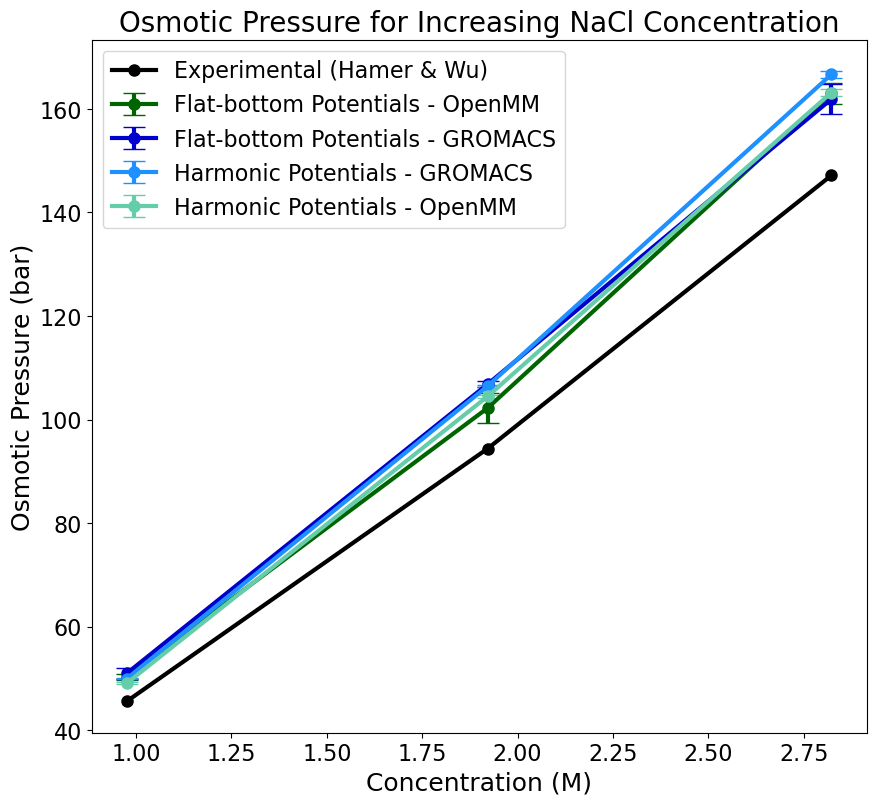

In [ ]:
#plt.errorbar(xconc,charmm_op, yerr=charmm_operr, fmt='o', linestyle='-',color='purple', capsize=5, label='CHARMM27')
#plt.plot(xconc,yroux, marker='o', linestyle='-',color='blue', label='Luo & Roux 2010 (CHARMM27)')
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,9))
plt.plot(xconc,yexpOP, marker='o', linestyle='-',color='black', label='Experimental (Hamer & Wu)',linewidth=3,markersize=8)
plt.errorbar(xconc,off_op, yerr=off_operr, fmt='o', linestyle='-',color='darkgreen', capsize=8, label='Flat-bottom Potentials - OpenMM',linewidth=3,markersize=8)
plt.errorbar(xconc,jc_op, yerr=jc_operr, fmt='o', linestyle='-',color='mediumblue', capsize=8, label='Flat-bottom Potentials - GROMACS',linewidth=3,markersize=8)
plt.errorbar(xconc,yHP_OP, yerr=yHP_OPerr, fmt='o', linestyle='-',color='dodgerblue', capsize=8, label='Harmonic Potentials - GROMACS',linewidth=3,markersize=8)
plt.errorbar(xconc,yHP_OP_omm, yerr=yHP_OPerr_omm, fmt='o', linestyle='-',color='mediumaquamarine', capsize=8, label='Harmonic Potentials - OpenMM',linewidth=3,markersize=8)
plt.xlabel("Concentration (M)", fontsize=MEDIUM_SIZE)
plt.ylabel("Osmotic Pressure (bar)", fontsize=MEDIUM_SIZE)
plt.title('Osmotic Pressure for Increasing NaCl Concentration', fontsize=BIGGER_SIZE)
plt.legend()
plt.savefig('ops.png')
plt.show()

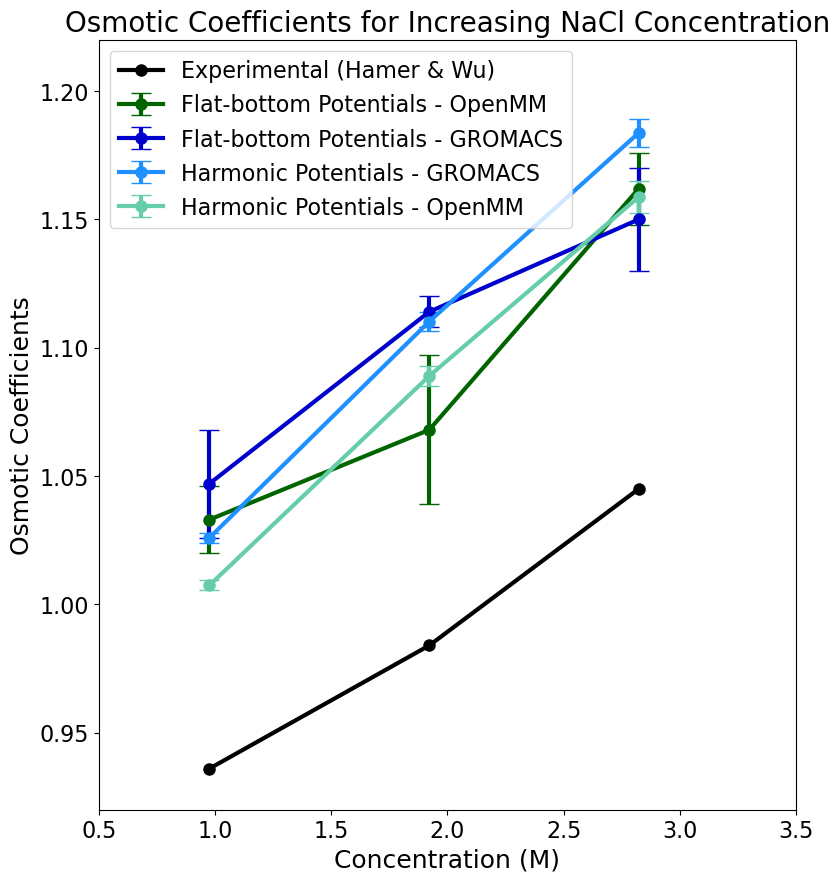

In [12]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(9.0,10.0))
plt.errorbar(xconc,off_oc, yerr=off_ocerr, fmt='o', linestyle='-',color='darkgreen', capsize=7, label='Flat-bottom Potentials - OpenMM', lw=3, markersize=8)
plt.errorbar(xconc,jc_oc, yerr=jc_ocerr, fmt='o', linestyle='-',color='mediumblue', capsize=7, label='Flat-bottom Potentials - GROMACS', lw=3, markersize=8)
plt.plot(xconc,yexpOC, marker='o', linestyle='-',color='k', label='Experimental (Hamer & Wu)', lw=3, markersize=8)
plt.errorbar(xconc,yHP_OC, yerr=yHP_OCerr, fmt='o', linestyle='-',color='dodgerblue', capsize=7, label='Harmonic Potentials - GROMACS', lw=3, markersize=8)
plt.errorbar(xconc,yHP_OC_omm, yerr=yHP_OCerr_omm, fmt='o', linestyle='-',color='mediumaquamarine', capsize=7, label='Harmonic Potentials - OpenMM', lw=3, markersize=8)
plt.xlabel("Concentration (M)",fontsize=MEDIUM_SIZE)
plt.ylabel("Osmotic Coefficients",fontsize=MEDIUM_SIZE)
plt.xlim(0.5,3.5)
plt.ylim(0.92,1.22)
plt.title('Osmotic Coefficients for Increasing NaCl Concentration', fontsize=BIGGER_SIZE)
plt.legend(prop={'size': 16}, loc='upper left')
plt.savefig('ocs.png')
plt.show()

In [13]:
# yOP=[m1op._value,m2opl._value,m3opl._value]
# yerrs=[m1err._value,m2errl._value,m3errl._value]
# yroux=[49.25814435639172,105.63795075630847,160.23739597931342]
# xconc=[xc1._value,xc2._value,xc3._value]
# yexp=[expOP_1m._value,expOP_2m._value,expOP_3m._value]
# plt.errorbar(xconc,yOP, yerr=yerrs, fmt='o', linestyle='-',color='purple', capsize=5, label='Calculated')
# plt.plot(xconc,yroux, marker='o', linestyle='-',color='blue', label='Luo & Roux 2010')
# plt.plot(xconc,yexp, marker='o', linestyle='-',color='red', label='Experimental (Hamer & Wu)')
# plt.xlabel("Concentration (M)")
# plt.ylabel("Osmotic Pressure (bar)")
# plt.title('Osmotic Pressure for Increasing Concentration (longer)')
# plt.legend()
# plt.show()